<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/2S2024_DBSCAN_%26_HDBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [108]:
#Creamos un dataset ficticio
from sklearn.datasets import make_blobs

# Generar datos con parámetros específicos
X, labels = make_blobs(
    n_samples=600,         # 600 puntos
    centers=5,             # 5 clusters
    n_features=4,          # 4 variables (X1, X2, X3 y X4)
    cluster_std=50,       # Dispersión de los clusters (para todos la misma)
    center_box=(0, 1000),  # Rango de los centros
    random_state=42        # Semilla
)

# Crear un DataFrame con los datos generados
df = pd.DataFrame(X, columns=['X1', 'X2', 'X3', 'X4'])
df['Cluster'] = labels


In [92]:
df.head()

,X1,X2,X3,X4,Cluster
0,768.885093,652.713754,77.482802,1132.749514,2
1,471.587452,658.802537,301.986895,374.202382,4
2,180.957009,313.739848,48.554059,894.078298,1
3,385.891853,1016.927374,890.595623,474.876934,0
4,556.786787,619.592306,3.289888,1141.080700,2


In [109]:
#Normalizamos las distancias de los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit(X)
X_scaled = scaled.transform(X)

#Otra manera:
X_scaled = StandardScaler().fit_transform(X)

In [110]:
# Crear un DataFrame con los datos generados
df_scaled = pd.DataFrame(X_scaled, columns=['X1', 'X2', 'X3', 'X4'])
df_scaled['Cluster'] = labels

In [83]:
df_scaled.head()

,X1,X2,X3,X4,Cluster
0,0.628725,0.658288,-0.991710,1.265079,2
1,-0.620244,0.053146,0.547257,-0.939828,4
2,-1.251012,-1.178500,-0.853650,0.923290,1
3,-0.332375,1.474201,1.688968,0.049495,0
4,0.618017,0.656960,-0.995059,1.265403,2


In [111]:
db = DBSCAN()
db.get_params().keys()

dict_keys(['algorithm', 'eps', 'leaf_size', 'metric', 'metric_params', 'min_samples', 'n_jobs', 'p'])

In [112]:
#Generamos el modelo, indicando el epsilon y el min_samples:
db = DBSCAN(eps=0.5, min_samples=20).fit(X_scaled)

In [113]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_

# Número de clusters en las etiquetas ignorando el ruido presente
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
ruido = list(labels).count(-1)
print("Estimado número de cluster: ", num_clusters)
print("Estimado número de puntos ruidosos: ", ruido)

Estimado número de cluster:  5
Estimado número de puntos ruidosos:  0


In [155]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clusters(X, labels, core_samples_mask=None, title="Clusters encontrados"):
    """
    Visualiza los clusters generados por un modelo de clustering.

    Parámetros:
    ------------
    X : array-like, shape (n_samples, n_features)
        Conjunto de datos de entrada.

    labels : array-like, shape (n_samples,)
        Etiquetas del cluster asignadas por el modelo de clustering.

    core_samples_mask : array-like, opcional, shape (n_samples,)
        Máscara booleana para indicar los puntos núcleo (relevante para DBSCAN).
        Si es None, se considerarán todos los puntos como núcleo.

    title : str
        Título de la gráfica.

    Retorno:
    ---------
    None. Muestra una gráfica de clusters.
    """

    # Definimos los clusters únicos y generamos colores para cada uno
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Negro para el ruido
            col = [0, 0, 0, 1]

        # Filtramos los puntos del cluster actual
        class_member_mask = (labels == k)

        # Verificamos si hay una máscara de puntos núcleo, si no, todos son núcleo
        if core_samples_mask is None:
            core_samples_mask = np.ones_like(labels, dtype=bool)

        # Puntos núcleo
        xy_core = X[class_member_mask & core_samples_mask]
        plt.plot(
            xy_core[:, 0],
            xy_core[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

        # Puntos no-núcleo (frontera)
        xy_border = X[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy_border[:, 0],
            xy_border[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=2,
        )

    plt.title(title)
    plt.show()

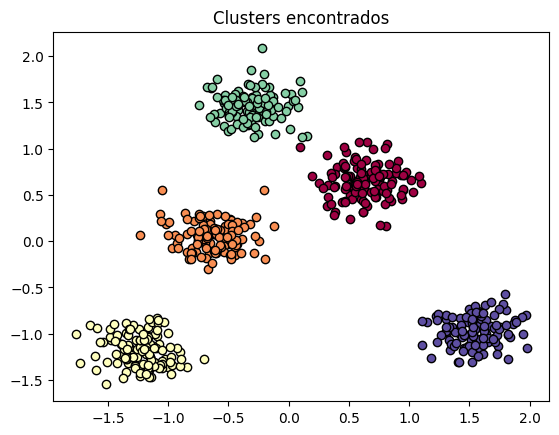

In [114]:
plot_clusters(X=X_scaled, labels=db.labels_, core_samples_mask=None, title="Clusters encontrados")

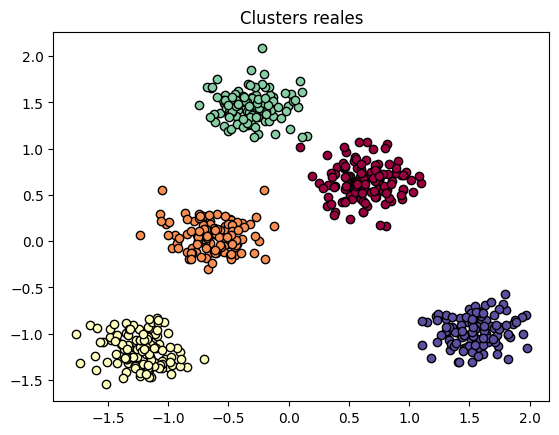

In [115]:
plot_clusters(X=X_scaled, labels=labels, core_samples_mask=None, title="Clusters reales")

### HDBSCAN

In [151]:
# Generar valores aleatorios para la dispersión de cada cluster
std_values = np.random.uniform(100, 500, 5)  # 5 valores aleatorios entre 10 y 50

# Generar datos con los parámetros específicos
X, labels = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=4,
    cluster_std=std_values,
    center_box=(0, 1000),
    random_state=42
)

In [118]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 29.3 MB/s eta 0:00:00


In [139]:
# importamos la librería
from hdbscan import HDBSCAN

In [152]:
#Escalamos los datos
X = StandardScaler().fit_transform(X)

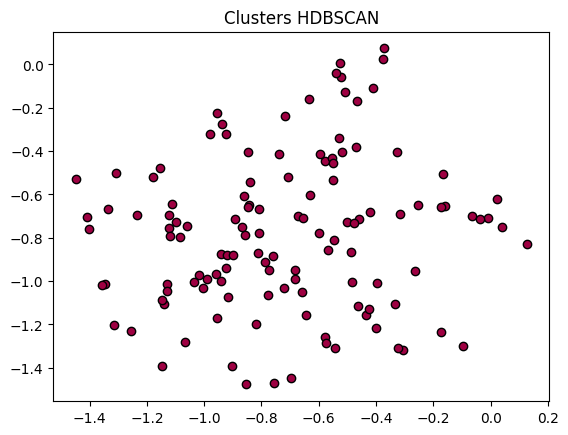

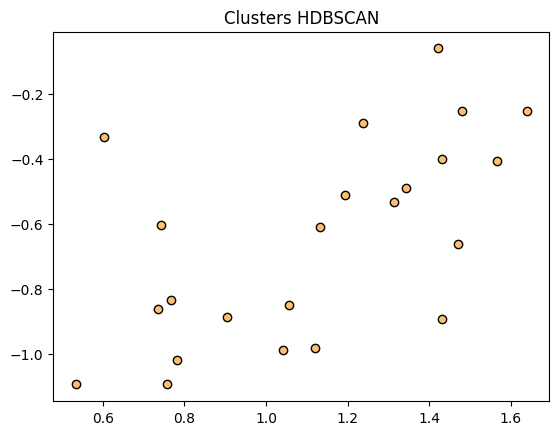

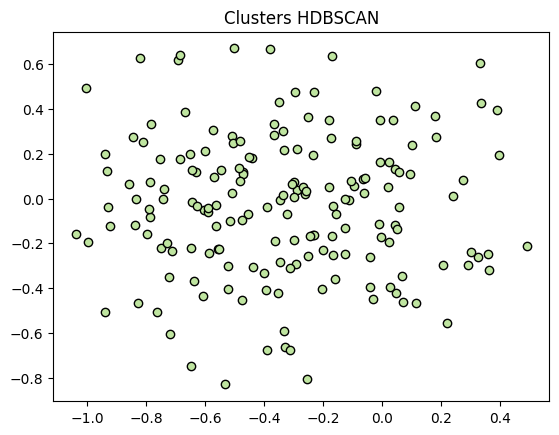

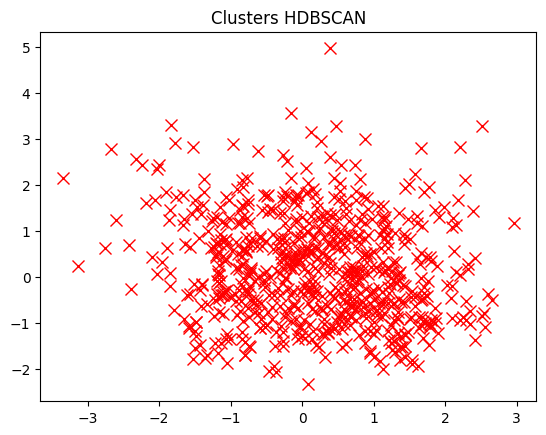

In [160]:
# Crear y entrenar el modelo HDBSCAN
hdb = HDBSCAN(min_cluster_size=10, min_samples=5).fit(X)
plot_clusters(X=X, labels=hdb.labels_, core_samples_mask=None, title="Clusters HDBSCAN")

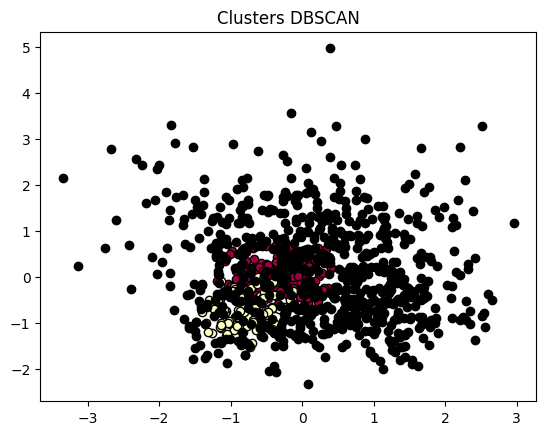

In [157]:
db = DBSCAN(eps=0.5, min_samples=20).fit(X)
plot_clusters(X=X, labels=db.labels_, core_samples_mask=None, title="Clusters DBSCAN")